In [4]:
import tensorboard as tb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tbparse import SummaryReader

In [20]:
log_dir = "./logs/events.out.tfevents.1668525103.dgx-node-0-1.cedia.edu.ec.2213441.0"
reader = SummaryReader(log_dir)
df = reader.scalars

train_acc = df[df.tag == "Accuracy/train"].value.values
test_acc = df[df.tag == "Accuracy/test"].value.values
train_loss = df[df.tag == "Loss/train"].value.values
test_loss = df[df.tag == "Loss/test"].value.values

idx_best_loss_test = test_loss.argmin()

print(f"""
Best Epoch: {idx_best_loss_test}
Best train loss: {train_loss[idx_best_loss_test]:.4f}
Best test loss: {test_loss[idx_best_loss_test]:.4f}
Best train accuracy: {train_acc[idx_best_loss_test]:.4f}
Best test accuracy: {test_acc[idx_best_loss_test]:.4f}
""")


Best Epoch: 99
Best train loss: 1.1192
Best test loss: 1.3018
Best train accuracy: 0.7839
Best test accuracy: 0.5971



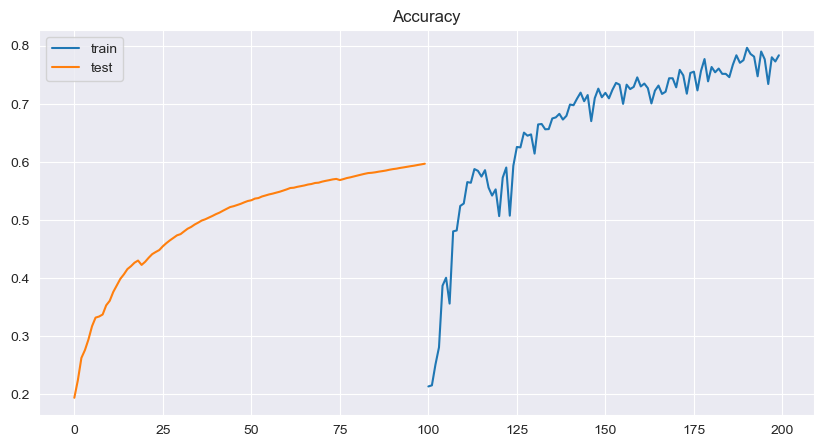

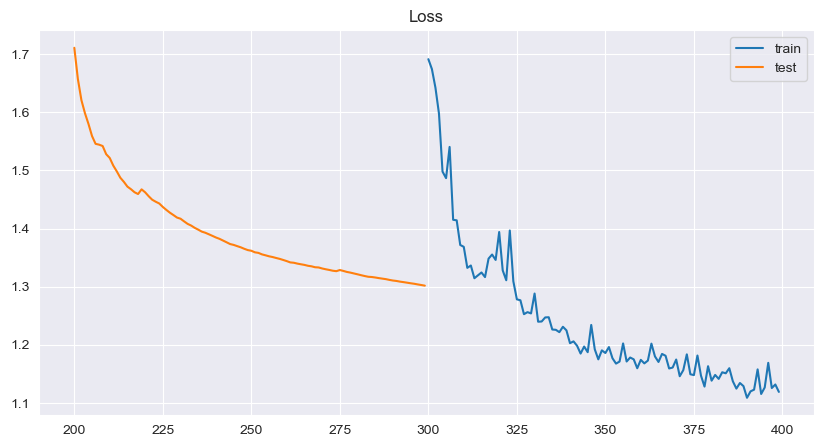

In [9]:
df_compact = pd.DataFrame({"train_acc": train_acc, "test_acc": test_acc, "train_loss": train_loss, "test_loss": test_loss})
df_compact.to_csv("./metrics/results.csv", index=False)

# plot training and validation accuracy
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label="train")
plt.plot(test_acc, label="test")
plt.title("Accuracy")
plt.legend()

# plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="train")
plt.plot(test_loss, label="test")
plt.title("Loss")
plt.legend()